##**Chapter 1 - Introduction to Quantum Computing - Week 1 - bits and qubits**

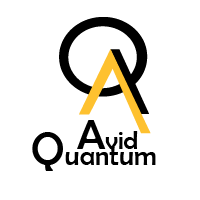




#**Overview**

###1. 1 - **From bit to qubit :** Dirac Notation, Measurements, Bloch Sphere
###1. 2 -  **Quantum Circuits :** Basic single-qubit & two-qubit gates, multiprofile quantum states
###1. 3  - **Entanglement :** Bell states, Teleportation, Q-sphere


==============================================

In [ ]:
'''
First you should install the qiskit library on your python to be able to run the quantum computing codes.
Qiskit is written in IBM.
'''
!pip install qiskit

In [ ]:
#here I import necessary packages and libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from iqx import *
from qiskit.quantum_info import Statevector

#**1.1	 From bit to qubit**

*   Classical states for computation are either "0" or "1"

*   In Quantum Mechanics a state can be in ***superposition***, $i.e.$ simultaneously in "0" and "1"
  *   Superposition allows to perform calculations on many states at the same time 
      *  Quantum algorithms will result to exponential speed-up calculations.

BUT:     Once we measure the superposition state, it collapses to one of its states    
          => This is not that easy to design Quantum algorithms, but we use ***interference effects***
















##**A Tossed Coin Example**

Lets understand the difference between bit and qubit with the Tossing Coin example:

<img src="" width="200px"/> 


### **First, the Classical Coin case** 

Consider you have a coin and you place it in the state Heads. If you then toss this fair coin and look at it, there is a 50% chance of seeing Heads again, and a 50% chance of seeing tails instead. 

We plot this on a probability tree like so:

<img src="https://lh3.googleusercontent.com/pw/ACtC-3fELnUKDLUQkWvvXoVIopcrCpcG5B7q2dAv-MSunhozWhqh9myKU3m1mbI2SjmK3H3ckip6YaeC_MLpzuY9CRY3jnwu5xQCuWxqU87QMVqD0AzWT4017wDtaI6iqKQC1ZoyUavMV3t5aq3tmUM3YkgP=w600-h400-no?authuser=1" width="250px"/> 

You have the same situation if you place your cone in the tails state:



<img src="https://lh3.googleusercontent.com/pw/ACtC-3e5Z0QBddpSBYe1IijTDxYFCfSYIdUXdn0JUL_cvhYP-AzjjIfgLJgjuHp2N5O5WwQRktgc29f2hoL1Mlx4zZv-OU6JHKH5MFmNjqelsPvjvrk01_1JvmUliCF2G8vgaIJvBeo5Qc2egbE3ngPJyjZR=w600-h400-no?authuser=1" width="250px"/> 

 You can physically get a coin out, flip it many times, and record each result; you will eventually see roughly 50% of your results are Heads and 50% tails. Around 500 to 1000 tosses should be enough to get reliable results.



We can go further and chain our probability trees together to predict the outcomes of chains of events. For example, let’s say we start in the state Heads, toss the coin, then toss the coin again, and work it out using the trees, by multiplying along the branches to calculate the probability of each combination of events:

<img src="https://lh3.googleusercontent.com/pw/ACtC-3eUh_RZmStUGvJ9p4KOr1II4-YWGWL4WiRHqGRP4MtbzaC6ORCLw_OicsdYK9xchjPcnsvRqMNUVEu4YgqzmVtQNAl6YD7aprv6lCYPD7EnrCbD0DVG_nniL5UmHPPLXweVwDaZ0ZrgKu7qMBf8R6Td=w800-h436-no?authuser=1" width="600" height="280" />

and you can find the probability of geting Head and tail:

<img src="https://lh3.googleusercontent.com/pw/ACtC-3cAvtuJ1Kjq5vys_wClrlm8YsQE6Lb3kYuSqf-qqb-UhO3Mc0wrvaOduXb6wf6kqHwZY3d6WiDGptyZw7AoVv3UwO1ZNs9VBAshROhS1pg8-ITDJsBRXO7O1FsN0usZzSs0IPhiLevoqLN0FNe-Xhvt=w1000-h436-no?authuser=1" width="600" height="280" />

as expected, 50% of your results are Heads and 50% tails. 

### **The Quantum Coin case** 

A qubit is something you can only play with in a lab, as they are very difficult to manipulate. Instead of the two states Heads and Tails, we call our qubit’s two states 0 and 1.

Quantum theory is probability theory with negative numbers. We can’t have negative probabilities as that doesn’t make sense. To accommodate this, we use a new quantity we call amplitudes and plot these on trees instead. To get around the fact that we cannot have negative probabilities, and that all our probabilities must add up to 1, we use a mathematical trick: We square our amplitudes to calculate the probabilities.

We can see that starting in the state 0, the quantum coin toss assigns equal amplitudes to both outcomes. When we square these amplitudes, they give us the correct probability of measuring 0 or 1 (50-50 chance). 


<img src="https://lh3.googleusercontent.com/pw/ACtC-3feCU7XGgeYh_5YT6A-TmjgRf1jHDAcanEi3SYxgSRxkvqYfZEA60at5vgPcP6rruBqW1f3xYt6WoQNgKvre4AUayMooohIqwKG-RBOhgR1W1SWHpIp-GvePE0cw77Ttg_9PdjKmff7dIpHkXN5vZ6W=w600-h400-no?authuser=1" width="250" />

Starting in the state 1, the amplitude tree is different:



<img src="https://lh3.googleusercontent.com/pw/ACtC-3dhPi2EnzI7gVpL3KqqkvM3uI-MaQqO-JTnMdRbVkVYYvIpJxrELsxGhzvlb7HXQFN-Qh8keBAQfusqwGC2fBFLVlSKZSTOgR5_y8conKbObn4zb8QUc4um064nPB7c9GZbyweuY4niAJDDuDfahHzi=w599-h364-no?authuser=1" width="250" />

Here we can see our first negative number appearing in the amplitude of the 1 outcome. When we square our amplitudes to calculate the probabilities, this negative sign disappears, and we see the 50-50 chance we measured above. The interesting result is when we chain these probabilities together.

Just like with classical probability, we multiply our amplitudes along the branches to calculate the amplitude of each outcome:

<img src="https://lh3.googleusercontent.com/pw/ACtC-3c1G5nLd7Lstyt_HwzpHioJk2tpDpXrlQrch5Q1MzfkwjjAVp4wg2JpOa7NuMpWVuYqC-n617XCMX4meAVDC6W_D-1vbgt3PeEJ48uDpiMBNayTJnMM6d0pCbQ6iWSipid3SVhpX09RQNMWMxiDQuFl=w799-h600-no?authuser=1" width="650" />

To find the probability of measuring each outcome, we add these amplitudes together, and then square them:


<img src="https://lh3.googleusercontent.com/pw/ACtC-3dZ5qrxCONJXZ4JgqyWiqXoyJOU7FYMehfEW1G6s1hxNnwnKExETe1S8_GRHT10szVDvnXVsBuTtZA08kTMONF4wEmRusmnkQ-tpBPaRjfZSWPo9mGfPI69lAo9AZf6LWOdf8gZdRiyHQgFk-LOnvK6=w1000-h600-no?authuser=1" width="650" />

We can see the amplitudes of finding the coin (qubit) in the state 1 cancel each other out, and we call this effect interference.

### **Question** : Verify for yourself that this model works when the initial state is 1.



##**Dirac Notation**

*   Used to describe Quantum states: Let a, b $\in$ $ \mathbb{C}^2$.

-- ket : $|$a$\rangle$ = $\big(\begin{smallmatrix}
  a_1\\
  a_2
\end{smallmatrix}\big)$ 

-- bra : $\langle b|$ =  $|b\rangle^\dagger$ =  $\big(\begin{smallmatrix}
  b_1\\ 
  b_2
\end{smallmatrix}\big)^
\dagger$ =  $(\begin{smallmatrix}
  b_1^*\space\space
  b_2^*
\end{smallmatrix})$ 



$\space\space\space\space\space\space\space\space\space\space\space\space\space$*example:* b = c + d$i$ \\
$\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space$b$^*$ = c - d$i$   
$\space$c, d $\in$ $ \mathbb{R}$

-- bra-ket : $\langle b|a\rangle$ = $a_1b_1^*$+ $a_2b_2^*$ = $\langle a|b\rangle^*$ $\in$ $ \mathbb{C}$.

-- ket-bra : $|$a$\rangle\langle$b$|$ = $\big(\begin{smallmatrix}
  a_1b_1^* & a_1b_2^*\\
  a_2b_1^* & a_2b_2^*
\end{smallmatrix}\big)$ 

*   We define the states    $|0\rangle$ = $\big(\begin{smallmatrix}
  0\\
  1
\end{smallmatrix}\big)$
and $|1\rangle$ = $\big(\begin{smallmatrix}
1\\
0
\end{smallmatrix}\big)$,  which are orthogonal : $\langle 0|1\rangle$ = (1 0) . $\big(\begin{smallmatrix}
0\\
1
\end{smallmatrix}\big)$ = 1 . 0 + 0 . 1 = 0

*   All Quantum states are normalized, for example if,

 $|\Psi\rangle=\frac{1}{\sqrt{2}}$ ($|$0$\rangle$ + $|$1$\rangle$) = $\big(\begin{smallmatrix}
\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}
\end{smallmatrix}\big)$ 

then

$\space\space\space\space\space$$\langle\Psi|=\frac{1}{\sqrt{2}}$ ($\langle$0$|$ + $\langle$1$|$) = $\big(\begin{smallmatrix}
\frac{1}{\sqrt{2}}~~
\frac{1}{\sqrt{2}}
\end{smallmatrix}\big)$ 

and $~$$\space\space\space\space\space$ $\langle\Psi|\Psi\rangle = 1$

##**Measurments**

*   We use orthogonal bases to describe & measure Quantum states

*   having a measurement onto the basis $\{ |0\rangle, |1\rangle\}$, the state will collapse into either of states $|0\rangle$ or $|1\rangle$ => as those are the eigenstates of $\sigma_z$, we call this a z-measurement.

$~~~~~~~~~~$$\sigma_z$ is the Pauli operator in $z$ direction which I will explain later for Pauli matrices.

*   There are infinitly many different bases, but the other common ones are:
$\{ |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\space\space ,\space\space |-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\}$ 

and $\{ |+ i\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)\space\space , \space\space|- i\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)\}$

corresponding to the eigenstates of $\sigma_x$ and $\sigma_y$ , respectively. 

* **Born Rule:** the probability that a state $|\Psi\rangle$ collapse during a projective measurement onto the basis $\{ |x\rangle, |x^+\rangle\}$ to the state $|x\rangle$ is given by:

$P(x) = |\langle x|\Psi\rangle|^2$, $~\Sigma_i P(x_i)=1$.


###**Examples:** 

**First example:**

$|\Psi\rangle = \frac{1}{\sqrt{3}} (|0\rangle + \sqrt{2} |1\rangle)$ is measured in the bases of $\{ |0\rangle, |1\rangle\}$:



=>$P(0)=|\langle 0|\Psi\rangle |^2 = |\langle 0|\frac{1}{\sqrt{3}} (|0\rangle + \sqrt{2} |1\rangle|^2 = |\frac{1}{\sqrt{3}}\langle 0|0\rangle + \sqrt{\frac{2}{3}}\langle 0|1\rangle|^2 =1/3, $

because 
$\langle 0|0\rangle = 1,$ and $\space \langle 0|1\rangle =0$.
Similar way $P(1) = 2/3$. 


Both probabilities need to add to 1.

**Second example:**

 $|\Psi\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$ is measured in the bases of $\{ |+\rangle, |-\rangle\}$:




=>$P(+)=|\langle +|\Psi\rangle |^2 = |\langle +|
\space\space\frac{1}{\sqrt{2}} \space\space(|0\rangle -  |1\rangle)|^2 =$ $|\frac{1}{\sqrt{2}}\space\space(\langle 0|+\langle 1|)~\cdot~ \frac{1}{\sqrt{2}}\space\space(|0\rangle -  |1\rangle)|^2 =$ $\frac{1}{4}\space|(\langle 0|0\rangle-\langle 0|1\rangle-\langle 1|0\rangle-\langle 1|1\rangle)|^2 = 0$.



=> as expected, $\langle +|\Psi\rangle = \langle +|-\rangle =0$.

##**Bloch Sphere**

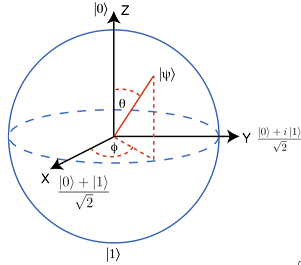

We can write any Normalized (pure) state as $|\Psi\rangle=\cos\frac{\theta}{2}|0\rangle +e^{i\phi}\sin\frac{\theta}{2}|1\rangle$ where $\phi\in[ 0, 2\pi]$ describes **the relative phase** and $\theta\in[0,\pi]$ and determines **the probibility** to measure $|0\rangle / |1\rangle$.  $ p(0) = \cos^2\frac{\theta}{2}$ and $p(1) = \sin^2 \frac{\theta}{2}.$ 

=> all normalized pure states can be illustrated on a surface of a sphere with radiuse $|\vec{r}|=1$, which we call the **Bloch Sphere.**

=> the coordinates of such a state are given by the

Bloch vector : $\vec{r} = \begin{pmatrix}
\sin\theta\cos\theta   \\
\sin\theta\sin\phi    \\
\cos\theta
\end{pmatrix}$

examples:

$|0\rangle$ : $\theta = 0$,  $\phi\space $arbitrary $ \Rightarrow$  $\begin{pmatrix}
0   \\
0    \\
1
\end{pmatrix}$

$|1\rangle$ : $\theta = \pi$,  $\phi\space$arbitrary $ \Rightarrow$  $\begin{pmatrix}
0   \\
0    \\
-1
\end{pmatrix}$

$|+\rangle$ : $\theta = \frac{\pi}{2}$,  $\phi=0\space\space\space\space\Rightarrow$ $\begin{pmatrix}
1   \\
0    \\
0
\end{pmatrix}$ $\Rightarrow~$the state lies on the $x$ axes

$|-\rangle$ : $\theta=\frac{\pi}{2}$,  $\phi=\pi\space\space\space\space\Rightarrow$   $\begin{pmatrix}
-1   \\
0    \\
0
\end{pmatrix}$ $\Rightarrow~$ the state lies on the $x$ axes

$|+i\rangle$ : $\theta=\frac{\pi}{2}$,  $\phi=\frac{\pi}{2}\space\space$ $\Rightarrow$  $\begin{pmatrix}
0   \\
1    \\
0
\end{pmatrix}$ $\Rightarrow~$ the state lies on the $y$ axes

$|-i\rangle$ : $\theta=\frac{\pi}{2}$,  $\phi=\frac{3\pi}{2}\space\space$  $\Rightarrow$  $\begin{pmatrix}
0   \\
-1    \\
0
\end{pmatrix}$ $\Rightarrow~$ the state lies on the $y$ axes



###**Bloch Sphere Example:** 
You can see these vectors on your sphere by changing the values for your vector.

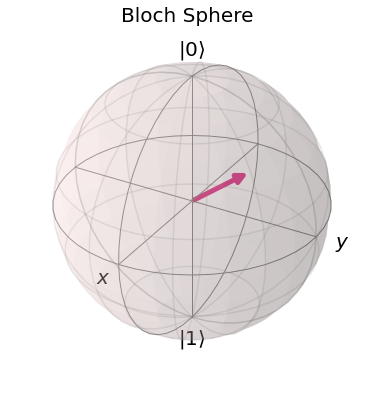

In [ ]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

#you can change the coordinates of your vector here:

plot_bloch_vector([1,1,1], title="Bloch Sphere")

Be Carefule: On the Bloch Sphere, algels are twice as big as in Hilbert Space, $e.g.$, $|0> \& |1>$ are orthogonal, but on Bloch Sphere their angle is $180^o$.

For a general state  $|\Psi>=\cos\frac{\theta}{2}|0>+e^{i\phi}\sin\frac{\theta}{2}|1>$

=> $\theta$ is the angel on Bloch Sphere, while $\frac{\theta}{2}$ is the actual angel that we have in Hilbert Space!

$=>\space z-~$measurement corresponds to a projection onto the $z-~$axis, and analogously for $x\space\space \&\space\space y$!

For projection onto the $z-$axis, with large probability the state collapses to $|0\rangle$ and with small probability it collapses onto $|1\rangle$.

Reminder: Eigenvectors of Matrices

We have seen that multiplying a vector by a matrix results in a vector:
$M|v\rangle  = |v'\rangle \leftarrow \text{new vector.}$

If we chose the right vectors and matrices, we can find a case in which this matrix multiplication is the same as doing a multiplication by a scalar:
$M|v\rangle  = \lambda|v\rangle\text{(Above, }$ $M$ $\text{ is a matrix, and } \lambda \text{ is a scalar)}$. For a matrix $M$, any vector that has this property is called an eigenvector of $M$. For example, the eigenvectors of the $Z-$matrix are the states $|0\rangle$ and $|1\rangle$:
\begin{aligned}
      Z|0\rangle & = |0\rangle \\
      Z|1\rangle & = -|1\rangle
      \end{aligned}
Since we use vectors to describe the state of our qubits, we often call these vectors eigenstates in this context. Eigenvectors are very important in quantum computing, and it is important you have a solid grasp of them.

###Example: First consider one qubit.

[1.+0.j 0.+0.j]


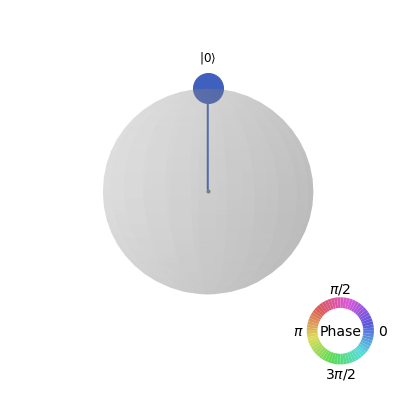

In [ ]:
'''   
First I start with one qubit (n=1) - and I create a quantum circuit with this one qubit
Then I get the state vector from my quantum circuit Statevector.from_instruction(qc)
I can print it - and then I can prot it on qsphere

Result: The state vector is [1.+0.j 0.+0.j] - the state at the beginning is q=|0> at north pole in qsphere
'''

n = 1
qc = QuantumCircuit(n)
statevec = Statevector.from_instruction(qc).data
print(statevec)
plot_state_qsphere(statevec)

###Now we add a Hadamard gate to see the superposition for one qubit

[0.70710678+0.j 0.70710678+0.j]


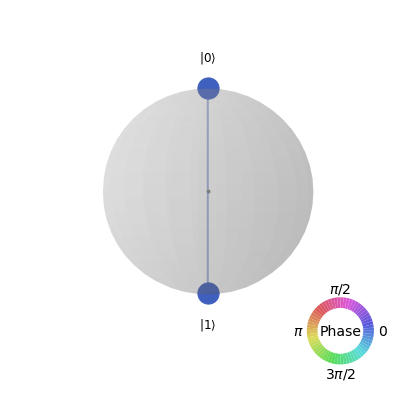

In [ ]:
'''   
We didn't do anything for previous example. Now I apply a Hadamard gate on the first qubit. 
Applying a Hadamard gate shows we are in an equal superposition from |0> and |1>

Result: Now the state vector is [0.70710678+0.j 0.70710678+0.j] - 
Now you can see the blobs are smaller and you have equal probability amplitude for |0>, and |1> : 0.70710678.

'''

n = 1
qc = QuantumCircuit(n)
qc.h(0)
statevec = Statevector.from_instruction(qc).data
print(statevec)
plot_state_qsphere(statevec)

###Now lets increase the number of qubits to two, and add a Hadamard gate to the first qubit.



[0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]


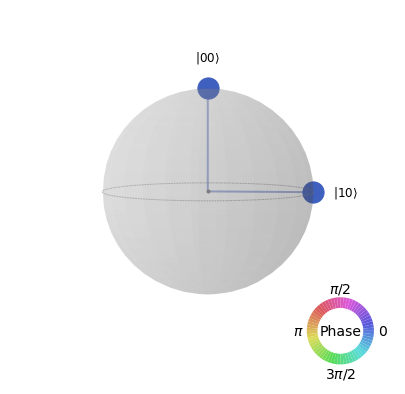

In [ ]:
'''   
Now what I can do is I can increase my number to plot the state on two qubits.
On two qubits the blob on the top is the state 00 now.
We have the states 01 and 10 because we applied Hadamard only to one cubit.
We have one qubit that is in a superposition of zero and one and the other qubit that is still in the state zero.

Result: Now the state vector is [0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j] - 
We have one qubit that is in a superposition of zero and one and the other qubit that is still in the state zero.
'''

n = 2
qc = QuantumCircuit(n)
qc.h(1)
statevec = Statevector.from_instruction(qc).data
print(statevec)
plot_state_qsphere(statevec)

###Now we want to create the Bell state.

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


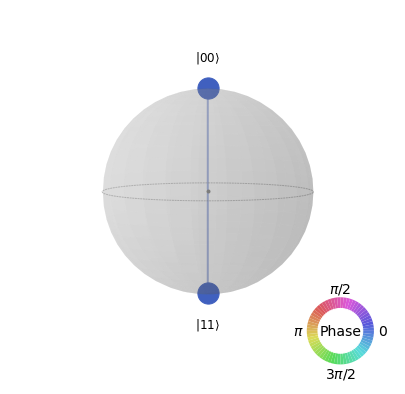

In [ ]:
'''   
Now we learned before how to create a Bell state.The Bell state means we apply first the Hadamard gate
on state zero, for example, and then the CNOT gate, and CNOT because the NOT gate is basically the X gate (CX).
And so we have qc.cx where now the zero is my control qubit. I control on state zero, on qubit zero
and then I have the target qubit as qubit one.

So if I apply this, I'm gonna get the Bell state, now we can see we have a four dimensional state vector
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j].

And the first and the last entries are both one over square root of two, which is just what we would expect.
And we can also see from the plot now, if we plot the Q-spher here, we get |00> on top, |11> on the bottom,
and we have an equal superposition and both are red.


Result: Now the state vector is [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j] - 
From the plot we get |00> on top, |11> on the bottom, and we have an equal superposition and both are red.
'''

n = 2
qc = QuantumCircuit(n)
qc.h(0)
qc.cx(0,1)

statevec = Statevector.from_instruction(qc).data
print(statevec)
plot_state_qsphere(statevec)

###Now if I add If I apply another X gate in the end to one of my qubits then I will get the state 01 plus 10.


[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


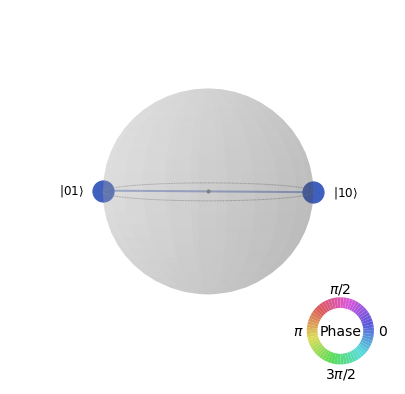

In [ ]:
'''
Now if I add a x gate to one of my qubits then I get the state |01> + |10>.
I am rotating the states to be the middle parallel and the state vector is:
[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j].

Result: Now the state vector is [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j] - 
From the plot we get |01> on the left side, |10> on the right side, and we have an equal superposition and both are red.
'''

n = 2
qc = QuantumCircuit(n)
qc.h(0)
qc.cx(0,1)
qc.x(1)
statevec = Statevector.from_instruction(qc).data
print(statevec)
plot_state_qsphere(statevec)

###Now if instead of another x gate, I apply a z gate that means that we have a |00> and -|11> but here the phase has changed, the blue color is because of phase which is $\pi$.

[ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]


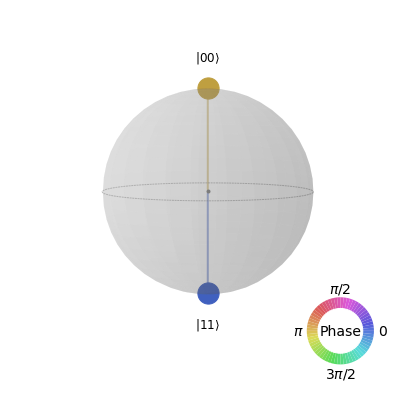

In [ ]:
'''
Now if instead of another x gate, I apply a z gate that means that we have a |00> 
and |11> but here the phase has changed, we have |00>-|11>.

Result: Now the state vector is [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j] - 
So we have a phase of pi and that's why the color is shown as blue.
'''

n = 2
qc = QuantumCircuit(n)
qc.h(0)
qc.cx(0,1)
qc.z(1)
statevec = Statevector.from_instruction(qc).data
print(statevec)
plot_state_qsphere(statevec)

###We could plot our circuit just with qc.draw.

In [ ]:
'''
What we could also do is instead of plotting the Q-sphere,
we could plot our circuit just with qc.draw.
And then we see here, this is what we did.
We applied the Hadamard gate, the CNOT gate,
and then the Z gate.
'''

n = 2
qc = QuantumCircuit(n)
qc.h(0)
qc.cx(0,1)
qc.z(1)
statevec = Statevector.from_instruction(qc).data
print(statevec)
qc.draw()

[ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]


┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐┌───┐
q_1: ─────┤ X ├┤ Z ├
          └───┘└───┘

###Lets consider n=6.

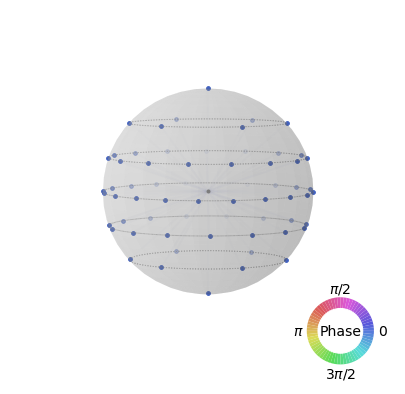

In [ ]:
'''
We can apply that with more qubits. Lets n=6, 
'''

n = 6
qc = QuantumCircuit(n,n)
for i in range(n):
  qc.h(i)
#qc.z(1)
statevec = Statevector.from_instruction(qc).data

#print(statevec)
#qc.draw()
#plot_state_qsphere(statevec)
plot_state_qsphere(statevec,show_state_labels=False)

Real Logo:

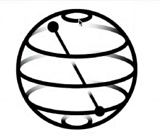

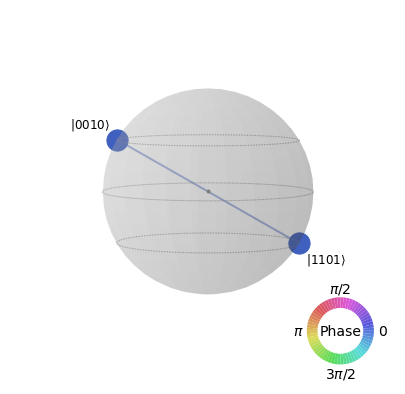

In [ ]:
qc = QuantumCircuit(4)
qc.h(0)
for i in range(3):
  qc.cx(0,i+1)
qc.x(1)
statevec = Statevector.from_instruction(qc).data
#print(statevec)
#qc.draw()
plot_state_qsphere(statevec)

